In [1]:
# let's import the required libraries and the data:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/BME1478H/Winter2020class/master/data/world-data-gapminder.csv'
world_data = pd.read_csv(url)

> #### Challenge 1
>
> 1. Find out how to change the x-axis to be log-scaled.
     Search online for how to change the scale of a matplotlib axes object.
     Remember that seaborn plots return matplotlib axes objects,
     so all matplotlib function to modify the axes will work on this plot.
     Good sites to use are the documentation pages for the respective package,
     and stackoverflow.
     However,
     it is often the fastest to type in a well chosen query in your favorite search engine.
> 2. In the logged plot,
     color the dots according to the region of the observation.
    


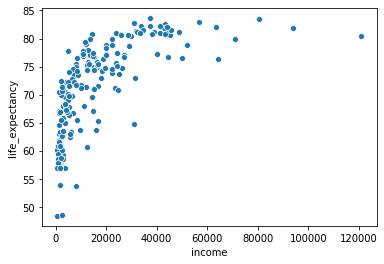

In [4]:
# reminder:we plotted before
# world_data_2014 = world_data.loc[world_data['year'] == 2014]
world_data_2014 = world_data.loc[world_data.year == 2014]

ax = sns.scatterplot(x='income', y='life_expectancy',
                     data=world_data_2014)

[None]

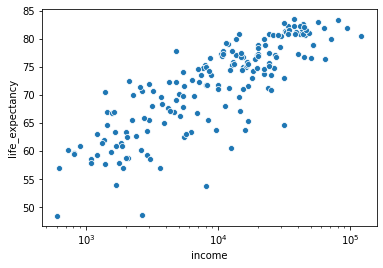

In [5]:
# x axis log scale 
ax = sns.scatterplot(x='income', y='life_expectancy',
                     data=world_data_2014)
ax.set(xscale='log')

[None]

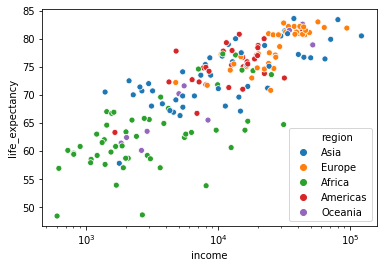

In [7]:
# color the dots according to the region 
ax = sns.scatterplot(x='income', y='life_expectancy', hue = 'region',
                     data=world_data_2014)
ax.set(xscale='log')

> #### Challenge 2
> 1. Subset dataframe for the years 1975, 1995, and 2015
> 2. plot women's education for regions and income groups and years

In [80]:
#reminder: let's first order the income_group alphabetically
world_data['income_group'] = (
    pd.Categorical(world_data['income_group'], ordered=True,
                   categories=['Low', 'Lower middle', 'Upper middle', 'High']))


# 1
world_data_selected_years = world_data[world_data.year.isin([1975,1995,2015])].reset_index()
world_data_selected_years.head(5)

,index,country,year,population,region,sub_region,income_group,life_expectancy,income,children_per_woman,child_mortality,pop_density,co2_per_capita,years_in_school_men,years_in_school_women,child_mortality_ratio
0,175,Afghanistan,1975,12600000,Asia,Southern Asia,Low,46.3,1210,7.45,277.0,19.3,0.1690,1.55,0.25,21.984127
1,195,Afghanistan,1995,17100000,Asia,Southern Asia,Low,51.1,881,7.61,150.0,26.2,0.0727,2.56,0.49,8.771930
2,215,Afghanistan,2015,33700000,Asia,Southern Asia,Low,57.9,1750,4.80,73.2,51.7,NaN,4.13,0.98,2.172107
3,394,Albania,1975,2410000,Europe,Southern Europe,Upper middle,70.3,4330,4.24,103.0,88.0,1.9100,6.70,6.01,42.738589
4,414,Albania,1995,3110000,Europe,Southern Europe,Upper middle,74.1,4130,2.59,32.9,113.0,0.6720,9.31,9.07,10.578778


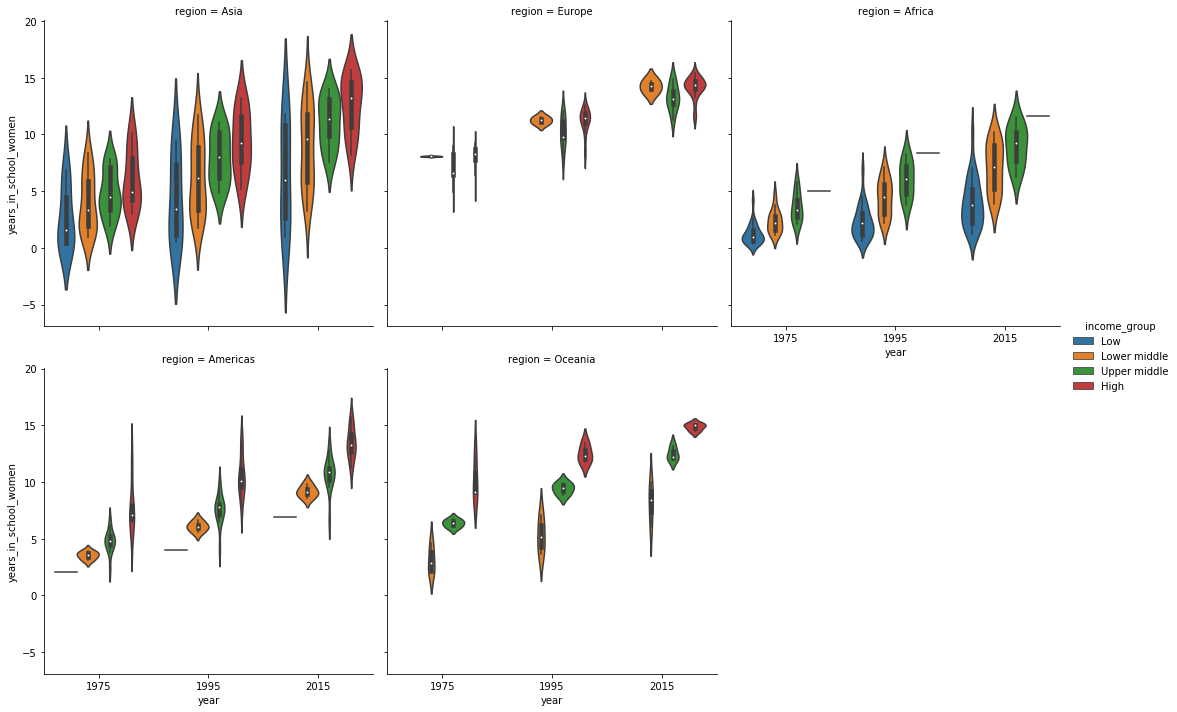

In [85]:
sns.catplot(x='year', y='years_in_school_women', hue='income_group', col='region',
            col_wrap=3,
            kind = 'violin', data=world_data_selected_years)

>#### Challenge 3
>
>1. Which data points and/or distribution statistics are displayed in each of the following plots: Boxplot, Violinplot, and Swarmplot?
>2. Out of the these plots,
>   which one do you think is the most informative and why?
>   Which is the most true to the underlying data?

- Boxplot shows a few distribution statistics (medain, quartiles, whiskers).
- Violin plot approximates the distribution with a smoothened histogram, which can be more informative for big data set, but misleading for small datasets.
- Swarmplot shows every observations which is great for small to medium data set, but becomes clusttered on large data sets.

Combinations of these plots can bring the best of both worlds as we will see soon!

>#### Challenge 4
>
> Combine a `stripplot()` with a `boxplot()`.
>   Set the `jitter` parameter to distribute the dots,
>   so that they are not all on one line.

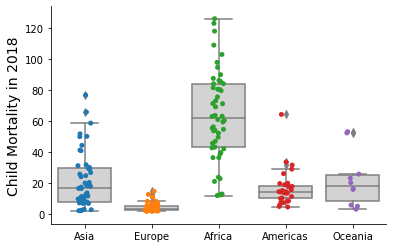

In [94]:
world_data_2018 = world_data[world_data.year==2018]


ax = sns.boxplot(x='region', y='child_mortality', data=world_data_2018, color='lightgrey')
ax = sns.stripplot(x='region', y='child_mortality', data=world_data_2018, jitter=True) 
ax.set_ylabel('Child Mortality in 2018', fontsize=14)
ax.set_xlabel('')
sns.despine()

#### Extra material: 
- Choose the three years identifing the start of each century and make a new dataset 
- Calculate child moratality ratio as the absolute child deaths per 1000 population and add as a column
- plot to compare between regions and income groups

In [131]:
world_data_selected_years = world_data[world_data.year.isin([1800,1900,2000])].reset_index()
#world_data_selected_years['child_mortality_ratio'] = world_data_selected_years['child_mortality']/(world_data_selected_years['population']/1000000)
world_data_selected_years['child_mortality_ratio'] = world_data_selected_years.child_mortality/((world_data_selected_years.population)/1000)
world_data_selected_years.head()

,index,country,year,population,region,sub_region,income_group,life_expectancy,income,children_per_woman,child_mortality,pop_density,co2_per_capita,years_in_school_men,years_in_school_women,child_mortality_ratio
0,0,Afghanistan,1800,3280000,Asia,Southern Asia,Low,28.2,603,7.00,469.0,NaN,NaN,NaN,NaN,0.142988
1,100,Afghanistan,1900,5020000,Asia,Southern Asia,Low,29.2,793,7.00,482.0,NaN,NaN,NaN,NaN,0.096016
2,200,Afghanistan,2000,20100000,Asia,Southern Asia,Low,51.6,972,7.49,130.0,30.8,0.0385,2.9,0.59,0.006468
3,219,Albania,1800,410000,Europe,Southern Europe,Upper middle,35.4,667,4.60,375.0,NaN,NaN,NaN,NaN,0.914634
4,319,Albania,1900,820000,Europe,Southern Europe,Upper middle,35.5,1160,4.60,374.0,NaN,NaN,NaN,NaN,0.456098


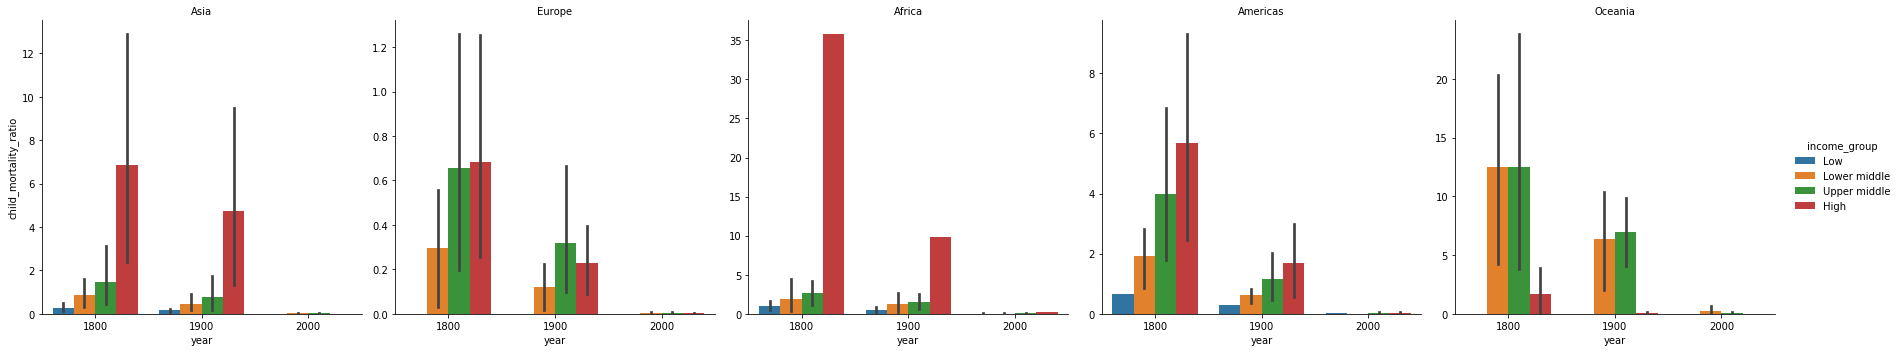

In [139]:
g = sns.catplot(y='child_mortality_ratio', x='year',
            hue='income_group', col='region', sharey=False,
            kind = 'bar', data=world_data_selected_years);
g.set_titles('{col_name}');

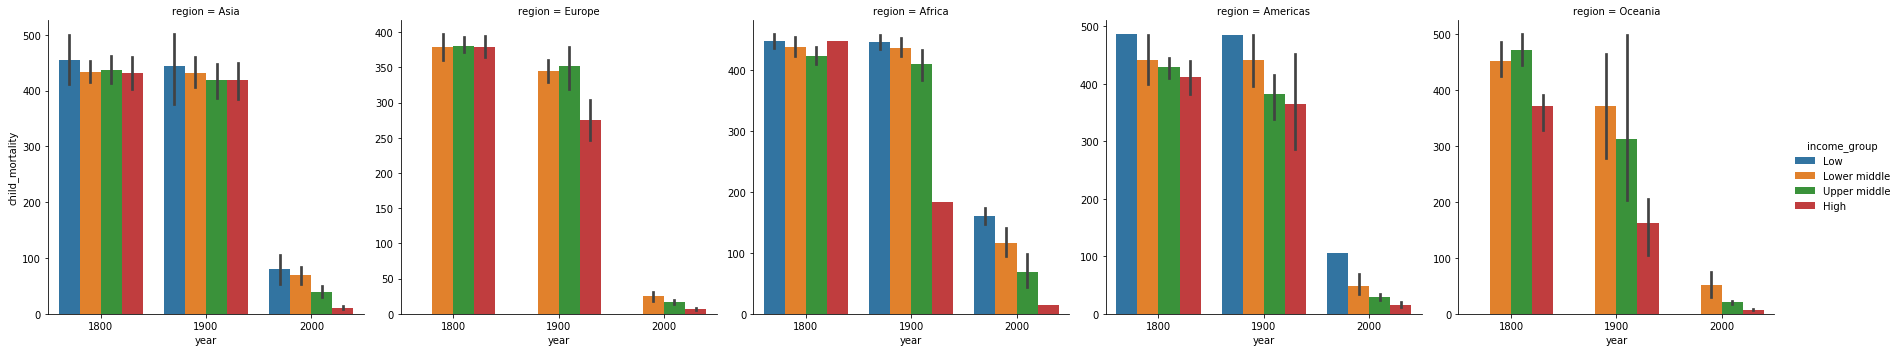

In [130]:
sns.catplot(y='child_mortality', x='year',
            hue='income_group', col='region', sharey=False,
            kind = 'bar', data=world_data_selected_years)